# Importing Libraries

In [1]:
#Importing all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
from matplotlib import pyplot as plt 

# Reading Data

### Loading Daatsets

In [2]:
non_event =pd.read_parquet("non_event.parquet")

In [3]:
event=pd.read_parquet("event.parquet")

In [4]:
app_label=pd.read_parquet("app_label.parquet")

In [5]:
app_events=pd.read_parquet("app_events.parquet")

### Basic Data Exploration

In [6]:
#basic information of non_event dataset
non_event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74840 entries, 0 to 74839
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   non_event.device_id     74840 non-null  int64 
 1   non_event.gender        74840 non-null  object
 2   non_event.age           74840 non-null  int64 
 3   non_event.group_train   74840 non-null  object
 4   non_event.bd_device_id  74840 non-null  int64 
 5   non_event.phone_brand   74840 non-null  object
 6   non_event.device_model  74840 non-null  object
dtypes: int64(3), object(4)
memory usage: 4.0+ MB


In [7]:
#First 5 rows
non_event.head()

,non_event.device_id,non_event.gender,non_event.age,non_event.group_train,non_event.bd_device_id,non_event.phone_brand,non_event.device_model
0,-7548291590301750000,M,33,M32+,-7548291590301750000,Huawei,è£è€€3C
1,-1819925713085810000,F,23,F0-24,-1819925713085810000,OPPO,N1 Mini
2,3670076507269740000,M,33,M32+,3670076507269740000,Meizu,menote1 2
3,5333872006968810000,M,34,M32+,5333872006968810000,Xiaomi,xnote
4,5263633571423510000,M,27,M25-32,5263633571423510000,Huawei,hu1 Plus


In [8]:
#basic information of event dataset
event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266933 entries, 0 to 1266932
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   event.device_id     1266933 non-null  int64  
 1   event.gender        1266933 non-null  object 
 2   event.age           1266933 non-null  int64  
 3   event.group_train   1266933 non-null  object 
 4   event.event_id      1215598 non-null  float64
 5   event.ev_device_id  1215598 non-null  float64
 6   event.date_time     1215598 non-null  object 
 7   event.longitude     1215598 non-null  float64
 8   event.latitude      1215598 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 87.0+ MB


In [9]:
#First 5 rows
event.head()

,event.device_id,event.gender,event.age,event.group_train,event.event_id,event.ev_device_id,event.date_time,event.longitude,event.latitude
0,-1000369272589010000,F,26,F25-32,NaN,NaN,None,NaN,NaN
1,-1000572055892390000,F,27,F25-32,NaN,NaN,None,NaN,NaN
2,-1000643208750510000,M,29,M25-32,NaN,NaN,None,NaN,NaN
3,-1001337759327040000,M,30,M25-32,2774404.0,-1.001338e+18,2016-05-07 09:14:24,119.0,29.70
4,-1001337759327040000,M,30,M25-32,3065018.0,-1.001338e+18,2016-05-04 10:26:14,120.0,30.42


In [10]:
#basic information of app_label dataset
app_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459943 entries, 0 to 459942
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   app_1.app_id        459943 non-null  int64 
 1   app_1.label_id      459943 non-null  int64 
 2   app_1.lab_label_id  459943 non-null  int64 
 3   app_1.category      459943 non-null  object
dtypes: int64(3), object(1)
memory usage: 14.0+ MB


In [11]:
#first five rows
app_label.head()

,app_1.app_id,app_1.label_id,app_1.lab_label_id,app_1.category
0,7324884708820027918,251,251,Finance
1,-4494216993218550286,251,251,Finance
2,6058196446775239644,406,406,unknown
3,6058196446775239644,407,407,DS_P2P net loan
4,8694625920731541625,406,406,unknown


In [12]:
#basic information of app_events dataset
app_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32473067 entries, 0 to 32473066
Data columns (total 4 columns):
 #   Column                   Dtype
---  ------                   -----
 0   app_events.event_id      int64
 1   app_events.app_id        int64
 2   app_events.is_installed  int64
 3   app_events.is_active     int64
dtypes: int64(4)
memory usage: 991.0 MB


In [13]:
#first five rows
app_events.head()

,app_events.event_id,app_events.app_id,app_events.is_installed,app_events.is_active
0,2,5927333115845830913,1,1
1,2,-5720078949152207372,1,0
2,2,-1633887856876571208,1,0
3,2,-653184325010919369,1,1
4,2,8693964245073640147,1,1


#### Findings
* Non_event, event and all_label datasets have repeated columns, which is a result of the sql left joins. This need to be removed.
* The columns need to be renamed, since it contains the table names along with the actual column names.
* App_label and app_events data need to be joined to form a single dataset(app_data)

#### Removing columns

In [14]:
#removing duplicate device_id column
non_event= non_event.drop(['non_event.bd_device_id'], axis = 1)

In [15]:
#removing duplicate device_id column
event= event.drop(['event.ev_device_id'], axis = 1)

In [16]:
#removing duplicate device_id column
app_label= app_label.drop(['app_1.lab_label_id'], axis = 1)

#### Renaming Columns

In [17]:
#Renaming columns
non_event.columns = ['device_id','gender','age', 'group_train', 'phone_brand', 'device_model']

In [18]:
#renaming columns
event.columns = ['device_id', 'gender','age', 'group_train', 'event_id','date_time','longitude', 'latitude']

In [19]:
#Renaming columns
app_label.columns = ['app_id', 'label_id', 'category']

In [20]:
#Renaming columns
app_events.columns = ['event_id', 'app_id', 'is_installed', 'is_active']

#### app_data

In [21]:
#merging app_label and app_events
app= app_events.merge(app_label,on="app_id", how="left")

In [22]:
#first 5 rows
app.head()

,event_id,app_id,is_installed,is_active,label_id,category
0,2,5927333115845830913,1,1,704,Property Industry 2.0
1,2,5927333115845830913,1,1,172,IM
2,2,5927333115845830913,1,1,548,Industry tag
3,2,5927333115845830913,1,1,710,Relatives 1
4,2,5927333115845830913,1,1,549,Property Industry 1.0


### Final Datasets

In [23]:
#info of dataset
non_event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74840 entries, 0 to 74839
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   device_id     74840 non-null  int64 
 1   gender        74840 non-null  object
 2   age           74840 non-null  int64 
 3   group_train   74840 non-null  object
 4   phone_brand   74840 non-null  object
 5   device_model  74840 non-null  object
dtypes: int64(2), object(4)
memory usage: 3.4+ MB


In [24]:
#info of dataset
event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266933 entries, 0 to 1266932
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   device_id    1266933 non-null  int64  
 1   gender       1266933 non-null  object 
 2   age          1266933 non-null  int64  
 3   group_train  1266933 non-null  object 
 4   event_id     1215598 non-null  float64
 5   date_time    1215598 non-null  object 
 6   longitude    1215598 non-null  float64
 7   latitude     1215598 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 77.3+ MB


In [25]:
#info of dataset
app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209355710 entries, 0 to 209355709
Data columns (total 6 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   event_id      int64 
 1   app_id        int64 
 2   is_installed  int64 
 3   is_active     int64 
 4   label_id      int64 
 5   category      object
dtypes: int64(5), object(1)
memory usage: 10.9+ GB


# Data Cleaning

### Drop Duplicates

In [26]:
non_event_rows = non_event.shape[0]
event_rows = event.shape[0]
app_rows = app.shape[0]

#Print the size (rows and columns) in all the data frames
print("non_event = ",non_event.shape," Rows = ",non_event_rows," Columns = ",non_event.shape[1])
print("event = ",event.shape," Rows = ",event_rows," Columns = ",event.shape[1])
print("app = ",app.shape," Rows = ",app_rows," Columns = ",app.shape[1])

non_event =  (74840, 6)  Rows =  74840  Columns =  6
event =  (1266933, 8)  Rows =  1266933  Columns =  8
app =  (209355710, 6)  Rows =  209355710  Columns =  6


In [27]:
#dropping duplicates
non_event.drop_duplicates(inplace=True)

In [28]:
#dropping duplicates
event.drop_duplicates(inplace=True)

In [29]:
#dropping duplicates
app.drop_duplicates(inplace=True)

In [30]:
#Print the number of rows dropped
print("Duplicate rows dropped in non_event = ",non_event_rows - non_event.shape[0])
print("Duplicate rows dropped in event = ",event_rows - event.shape[0])
print("Duplicate rows dropped in app = ",app_rows - app.shape[0])

Duplicate rows dropped in non_event =  194
Duplicate rows dropped in event =  0
Duplicate rows dropped in app =  1281276


In [31]:
#Print the size (rows and columns) in all the data frames
print("non_event = ",non_event.shape," Rows = ",non_event.shape[0]," Columns = ",non_event.shape[1])
print("event = ",event.shape," Rows = ",event.shape[0]," Columns = ",event.shape[1])
print("app = ",app.shape," Rows = ",app.shape[0]," Columns = ",app.shape[1])

non_event =  (74646, 6)  Rows =  74646  Columns =  6
event =  (1266933, 8)  Rows =  1266933  Columns =  8
app =  (208074434, 6)  Rows =  208074434  Columns =  6


### Exporting datasets without duplicates to s3

In [32]:
import awswrangler as wr

wr.s3.to_parquet(
    df=non_event,
    path="s3://capstonemlc/NoDuplicates_backup/non_event.parquet"
)

{'paths': ['s3://capstonemlc/NoDuplicates_backup/non_event.parquet'],
 'partitions_values': {}}

In [33]:
wr.s3.to_parquet(
    df=event,
    path="s3://capstonemlc/NoDuplicates_backup/event.parquet"
)

{'paths': ['s3://capstonemlc/NoDuplicates_backup/event.parquet'],
 'partitions_values': {}}

In [34]:
wr.s3.to_parquet(
    df=app,
    path="s3://capstonemlc/NoDuplicates_backup/app.parquet"
)

{'paths': ['s3://capstonemlc/NoDuplicates_backup/app.parquet'],
 'partitions_values': {}}

### Check Datatypes

In [35]:
non_event.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74646 entries, 0 to 74839
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   device_id     74646 non-null  int64 
 1   gender        74646 non-null  object
 2   age           74646 non-null  int64 
 3   group_train   74646 non-null  object
 4   phone_brand   74646 non-null  object
 5   device_model  74646 non-null  object
dtypes: int64(2), object(4)
memory usage: 4.0+ MB


In [36]:
event.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1266933 entries, 0 to 1266932
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   device_id    1266933 non-null  int64  
 1   gender       1266933 non-null  object 
 2   age          1266933 non-null  int64  
 3   group_train  1266933 non-null  object 
 4   event_id     1215598 non-null  float64
 5   date_time    1215598 non-null  object 
 6   longitude    1215598 non-null  float64
 7   latitude     1215598 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 87.0+ MB


In [37]:
app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208074434 entries, 0 to 209355709
Data columns (total 6 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   event_id      int64 
 1   app_id        int64 
 2   is_installed  int64 
 3   is_active     int64 
 4   label_id      int64 
 5   category      object
dtypes: int64(5), object(1)
memory usage: 10.9+ GB


#### Columns to be converted
* date_type in events table need to be converted to data_time data type

In [38]:
event['date_time']= pd.to_datetime(event['date_time'])

In [39]:
event.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1266933 entries, 0 to 1266932
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   device_id    1266933 non-null  int64         
 1   gender       1266933 non-null  object        
 2   age          1266933 non-null  int64         
 3   group_train  1266933 non-null  object        
 4   event_id     1215598 non-null  float64       
 5   date_time    1215598 non-null  datetime64[ns]
 6   longitude    1215598 non-null  float64       
 7   latitude     1215598 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 87.0+ MB


In [40]:
event.head()

,device_id,gender,age,group_train,event_id,date_time,longitude,latitude
0,-1000369272589010000,F,26,F25-32,NaN,NaT,NaN,NaN
1,-1000572055892390000,F,27,F25-32,NaN,NaT,NaN,NaN
2,-1000643208750510000,M,29,M25-32,NaN,NaT,NaN,NaN
3,-1001337759327040000,M,30,M25-32,2774404.0,2016-05-07 09:14:24,119.0,29.70
4,-1001337759327040000,M,30,M25-32,3065018.0,2016-05-04 10:26:14,120.0,30.42


### Missing and null values

In [41]:
#count of missing values
non_event.isna().sum()

device_id       0
gender          0
age             0
group_train     0
phone_brand     0
device_model    0
dtype: int64

In [42]:
#count of missing vales
event.isna().sum()

device_id          0
gender             0
age                0
group_train        0
event_id       51335
date_time      51335
longitude      51335
latitude       51335
dtype: int64

In [43]:
#count of null values
app.isna().sum()

event_id        0
app_id          0
is_installed    0
is_active       0
label_id        0
category        0
dtype: int64

In [44]:
#count of null values
non_event.isnull().sum()

device_id       0
gender          0
age             0
group_train     0
phone_brand     0
device_model    0
dtype: int64

In [45]:
#count of null values
event.isnull().sum()

device_id          0
gender             0
age                0
group_train        0
event_id       51335
date_time      51335
longitude      51335
latitude       51335
dtype: int64

In [46]:
#count of null values
app.isnull().sum()

event_id        0
app_id          0
is_installed    0
is_active       0
label_id        0
category        0
dtype: int64

### Clean location data

In [47]:
#summary statistics of filtered data
event[(event['latitude'] == 0) & (event['longitude'] != 0)].describe()

,device_id,age,event_id,longitude,latitude
count,1.440000e+02,144.000000,1.440000e+02,144.0,144.0
mean,1.255738e+18,24.062500,1.533362e+06,-180.0,0.0
std,5.318087e+18,3.393162,9.477429e+05,0.0,0.0
min,-6.119480e+18,19.000000,1.740100e+04,-180.0,0.0
25%,-1.053521e+18,22.000000,5.781582e+05,-180.0,0.0
50%,6.351314e+17,24.000000,1.630040e+06,-180.0,0.0
75%,8.016963e+18,25.250000,2.378794e+06,-180.0,0.0
max,8.036459e+18,29.000000,3.235991e+06,-180.0,0.0


In [48]:
#filtering data for cleaning location
event.loc[((event['latitude'] == 0) & (event['longitude'] == -180)),['longitude']] = 0

In [49]:
#revisiting summary statistics
event[(event['latitude'] != 0) & (event['longitude'] == 0)].describe()

,device_id,age,event_id,longitude,latitude
count,5.820000e+02,582.000000,5.820000e+02,582.0,582.000000
mean,-1.167871e+18,35.223368,1.625254e+06,0.0,0.584708
std,5.305249e+18,12.911120,9.293272e+05,0.0,0.576155
min,-8.968005e+18,20.000000,4.300000e+02,0.0,-0.490000
25%,-6.120802e+18,26.000000,8.050502e+05,0.0,0.140000
50%,-1.746174e+18,30.000000,1.645155e+06,0.0,0.650000
75%,2.513040e+18,43.000000,2.423760e+06,0.0,1.050000
max,9.212688e+18,71.000000,3.248436e+06,0.0,1.490000


In [50]:
#filtering location data
event.loc[((event['latitude'] != 0) & (event['longitude'] == 0)),['latitude']] = 0

## Exploratory Data Analysis

### non_event dataset

In [51]:
#summary statistics
non_event.describe()

,device_id,age
count,7.464600e+04,74646.000000
mean,-6.788546e+14,31.410163
std,5.327149e+18,9.868791
min,-9.223067e+18,1.000000
25%,-4.617358e+18,25.000000
50%,-1.837725e+16,29.000000
75%,4.637026e+18,36.000000
max,9.222849e+18,96.000000


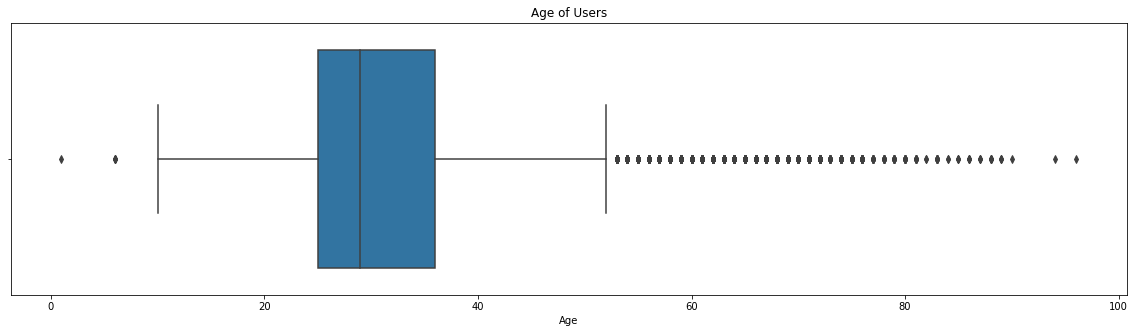

In [52]:
#box plot for age
fig = plt.figure(figsize=(20, 5))
sns.boxplot(data = non_event, x = non_event['age'])
plt.xlabel("Age")
plt.title("Age of Users")
plt.show()

The above boxplots clearly shows the presence of outliers.

In [53]:
#dropping rows with outliers
non_event=non_event[~(non_event['age']>90)]

In [54]:
non_event=non_event[~(non_event['age']<16)]

#### Plot appropriate graphs representing the distribution of age and gender in the data set 

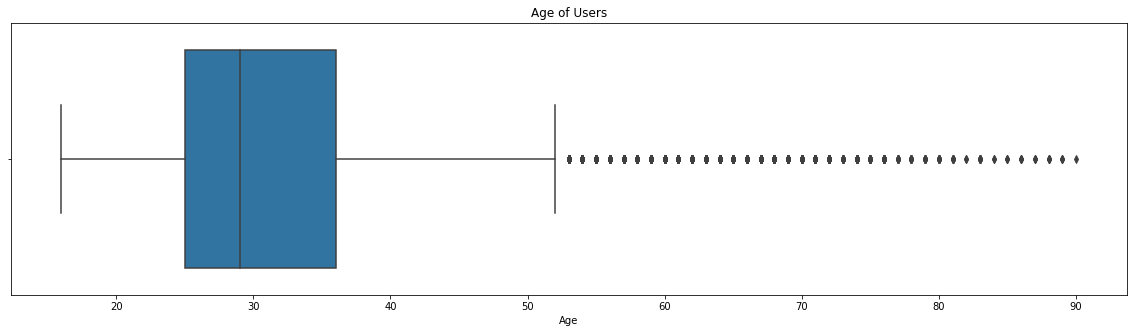

In [55]:
#Replotting age variable
fig = plt.figure(figsize=(20, 5))
sns.boxplot(data = non_event, x = non_event['age'])
plt.xlabel("Age")
plt.title("Age of Users")
plt.show()

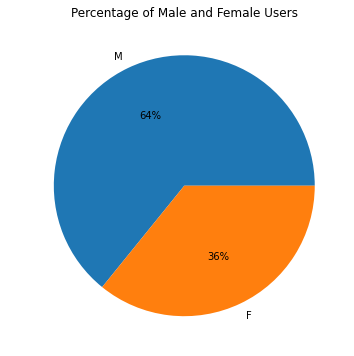

In [56]:
#gender distribution
plt.figure(figsize=(17,6))
non_event.gender.value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Percentage of Male and Female Users")
plt.ylabel(" ")
plt.show()

It can be seen that majority of the users are males, about 64%. Around 36% of users are females.

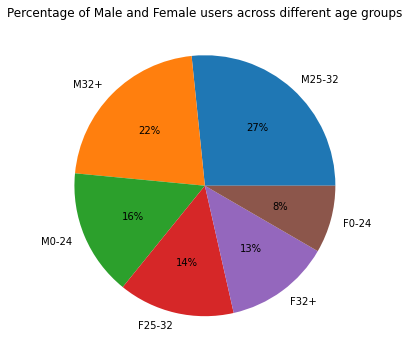

In [57]:
#Age group distribution
plt.figure(figsize=(17,6))
non_event.group_train.value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Percentage of Male and Female users across different age groups")
plt.ylabel(" ")
plt.show()

* Most of the male and female users belong to 25-32
* The least number of users in both genders belong to 0-24 age group

#### Boxplot analysis for gender and age 

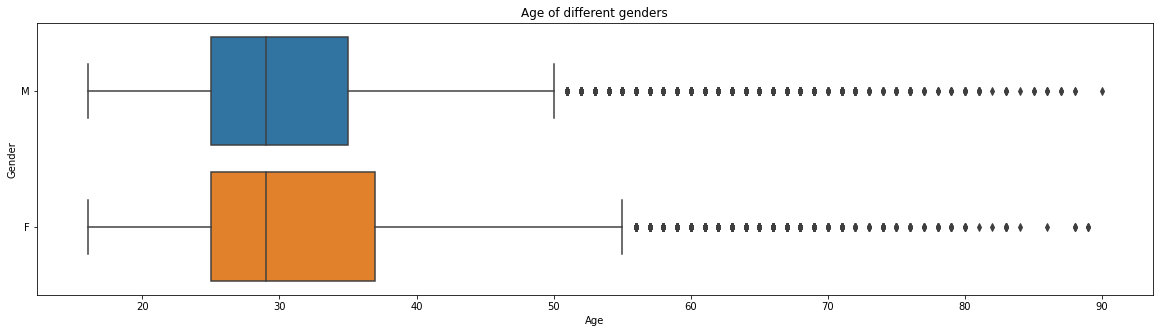

In [58]:
#Boxplot of age and gender variables from non_event dataset
fig = plt.figure(figsize=(20, 5))
sns.boxplot(data = non_event, x = non_event['age'], y=non_event["gender"])
plt.xlabel("Age")
plt.ylabel("Gender")
plt.title("Age of different genders")
plt.show()

* The mean age of both genders are same, And both lie near 30 yearss old.

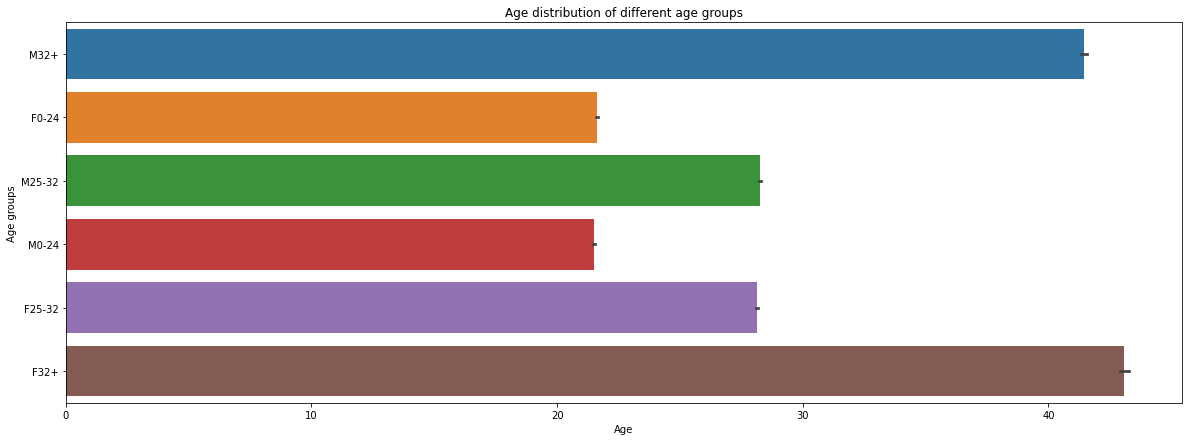

In [59]:
#Barplot of age group distribution
fig = plt.figure(figsize=(20,7))
sns.barplot(data = non_event, x = non_event['age'], y=non_event["group_train"])
plt.xlabel("Age")
plt.ylabel("Age groups")
plt.title("Age distribution of different age groups")
plt.show()

<Figure size 1080x360 with 0 Axes>

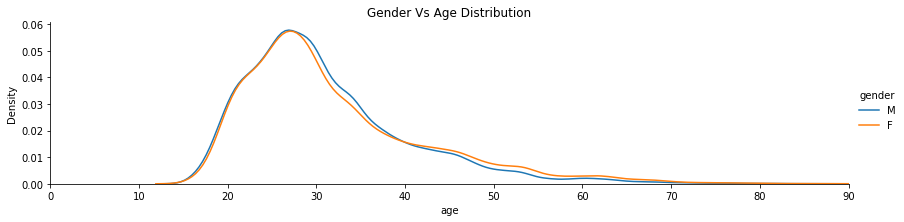

In [60]:
plt.figure(figsize=(15,5))
facet = sns.FacetGrid(non_event, hue="gender",aspect=4, hue_order=['M', 'F'])
facet.map(sns.kdeplot,'age')
facet.set(xlim=(0, non_event['age'].max()))
facet.add_legend()
plt.title("Gender Vs Age Distribution")
plt.show()

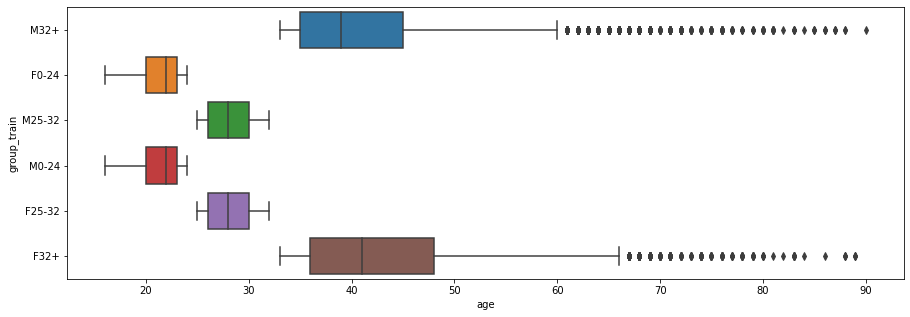

In [61]:
plt.figure(figsize=(15,5))
sns.boxplot(data = non_event, x = non_event['age'],y=non_event['group_train'])
plt.show()

All the plots above shows the distribution of users of different age groups and also their ages across genders

#### Distibution of phone brands

In [62]:
#Count of phone brands
df=non_event['phone_brand'].value_counts()

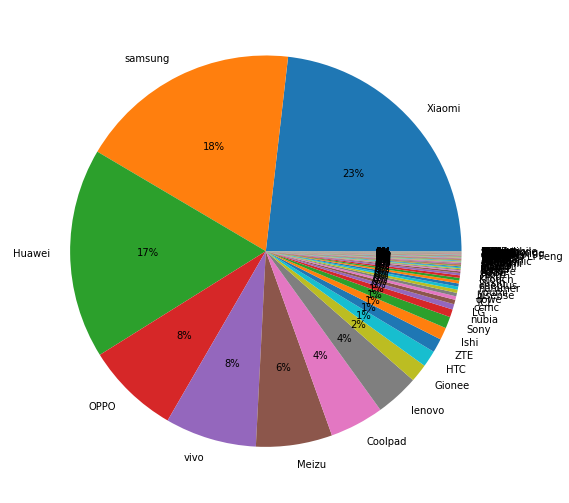

In [63]:
#plot of the distribution of phone brands
plt.figure(figsize=(17,9))
df.plot.pie(autopct='%1.0f%%')
plt.ylabel(" ")
plt.show()

* Most of the usrs use the phone brand Xiaomi, followed by Samsung and Huawei

In [64]:
#top ten mobile brands
df.head(10)

Xiaomi     17272
samsung    13653
Huawei     12946
OPPO        5773
vivo        5627
Meizu       4693
Coolpad     3327
lenovo      2679
Gionee      1119
HTC         1012
Name: phone_brand, dtype: int64

### event dataset

In [65]:
#summary statistics
event.describe()

,device_id,age,event_id,longitude,latitude
count,1.266933e+06,1.266933e+06,1.215598e+06,1.215598e+06,1.215598e+06
mean,-2.967925e+16,3.340051e+01,1.626675e+06,7.809869e+01,2.182723e+01
std,5.322606e+18,9.762003e+00,9.396631e+05,5.353026e+01,1.564865e+01
min,-9.223067e+18,1.000000e+00,1.000000e+00,-1.550000e+02,-3.380000e+01
25%,-4.668347e+18,2.600000e+01,8.123205e+05,0.000000e+00,0.000000e+00
50%,-1.115514e+17,3.100000e+01,1.627310e+06,1.120000e+02,2.857000e+01
75%,4.631837e+18,3.900000e+01,2.440380e+06,1.170000e+02,3.401000e+01
max,9.222849e+18,9.600000e+01,3.252948e+06,1.510000e+02,5.364000e+01


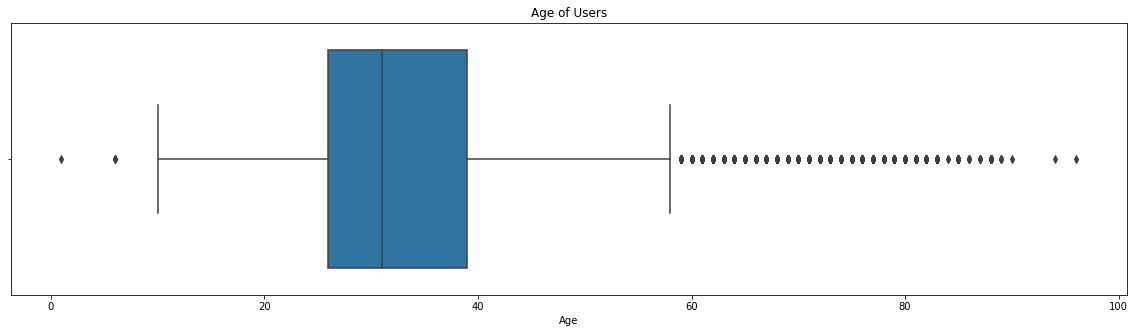

In [66]:
#box plot for age
fig = plt.figure(figsize=(20, 5))
sns.boxplot(data = event, x = event['age'])
plt.xlabel("Age")
plt.title("Age of Users")
plt.show()

In [67]:
#dropping rows with outliers
event=event[~(event['age']>90)]

In [68]:
event=event[~(event['age']<16)]

#### Plot the percentage of the device_ids with and without event data

In [69]:
#dataframe with device_id and event_id varaibles
device_event = event[['device_id','event_id']]
device_event.head()

,device_id,event_id
0,-1000369272589010000,NaN
1,-1000572055892390000,NaN
2,-1000643208750510000,NaN
3,-1001337759327040000,2774404.0
4,-1001337759327040000,3065018.0


In [70]:
#dropping duplicates, if any
device_event.drop_duplicates(inplace=True)

/home/ec2-user/.local/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [71]:
#Groupby device id and resetting the index 
device_event = device_event.groupby(['device_id'])['event_id'].max().reset_index()

In [72]:
#Defining a function to map the presence of event_ids
def label_event_exists (row):
    if row['event_id'] > 0:
        return 1
    else:
        return 0

In [73]:
#Applying the fuction on the dataframe
device_event['race_label'] = device_event.apply (lambda row: label_event_exists(row), axis=1)

In [74]:
#first five rows
device_event.head()

,device_id,event_id,race_label
0,-9223067244542180000,NaN,0
1,-9222956879900150000,2946562.0,1
2,-9222754701995930000,NaN,0
3,-9222352239947200000,NaN,0
4,-9222173362545970000,NaN,0


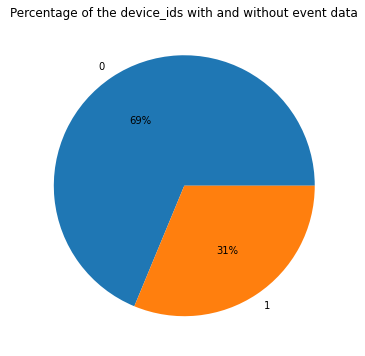

In [75]:
#Plot of device_ids
plt.figure(figsize=(17,6))
device_event.race_label.value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Percentage of the device_ids with and without event data")
plt.ylabel(" ")
plt.show()

Around 69% of devices ahve resticted permission to record an event

#### Plot a graph representing the distribution of events over different days of a week

In [76]:
#Extracting year, month, week, day of the week, day and hour from date_time variable
event['year'] = event['date_time'].dt.year
event['month'] = event['date_time'].dt.month
event['hour'] = event['date_time'].dt.hour
event['day'] = event['date_time'].dt.day
event['dayofweek'] = event['date_time'].dt.day_name()
event['week'] = event['date_time'].dt.week

/home/ec2-user/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  import sys


In [77]:
#setting proper data types
event["year"] = event["year"].astype(pd.Int32Dtype())
event["month"] = event["month"].astype(pd.Int32Dtype())
event["hour"] = event["hour"].astype(pd.Int32Dtype())
event["day"] = event["day"].astype(pd.Int32Dtype())
event["week"] = event["week"].astype(pd.Int32Dtype())

In [78]:
#filtering data
events_data = event[event.event_id > 0]

In [79]:
#first five rows
events_data.head()

,device_id,gender,age,group_train,event_id,date_time,longitude,latitude,year,month,hour,day,dayofweek,week
3,-1001337759327040000,M,30,M25-32,2774404.0,2016-05-07 09:14:24,119.0,29.70,2016,5,9,7,Saturday,18
4,-1001337759327040000,M,30,M25-32,3065018.0,2016-05-04 10:26:14,120.0,30.42,2016,5,10,4,Wednesday,18
5,-1001337759327040000,M,30,M25-32,3230344.0,2016-05-04 10:04:42,120.0,30.41,2016,5,10,4,Wednesday,18
6,-1001337759327040000,M,30,M25-32,2906128.0,2016-05-07 10:24:32,119.0,29.80,2016,5,10,7,Saturday,18
7,-1001337759327040000,M,30,M25-32,2876843.0,2016-05-07 10:23:56,119.0,29.80,2016,5,10,7,Saturday,18


In [80]:
#summary statistics
events_data.describe()

,device_id,age,event_id,longitude,latitude,year,month,hour,day,week
count,1.215460e+06,1.215460e+06,1.215460e+06,1.215460e+06,1.215460e+06,1215460.0,1.215460e+06,1.215460e+06,1.215460e+06,1.215460e+06
mean,-3.129549e+16,3.350256e+01,1.626672e+06,7.810594e+01,2.182935e+01,2016.0,4.999689e+00,1.306221e+01,4.025886e+00,1.786478e+01
std,5.322494e+18,9.743704e+00,9.396675e+05,5.352744e+01,1.564801e+01,0.0,1.763227e-02,6.358523e+00,2.022683e+00,3.419599e-01
min,-9.222957e+18,1.600000e+01,1.000000e+00,-1.550000e+02,-3.380000e+01,2016.0,4.000000e+00,0.000000e+00,1.000000e+00,1.700000e+01
25%,-4.672948e+18,2.700000e+01,8.123082e+05,0.000000e+00,0.000000e+00,2016.0,5.000000e+00,8.000000e+00,2.000000e+00,1.800000e+01
50%,-1.194890e+17,3.100000e+01,1.627296e+06,1.120000e+02,2.857000e+01,2016.0,5.000000e+00,1.300000e+01,4.000000e+00,1.800000e+01
75%,4.631837e+18,3.900000e+01,2.440386e+06,1.170000e+02,3.401000e+01,2016.0,5.000000e+00,1.900000e+01,6.000000e+00,1.800000e+01
max,9.220915e+18,8.900000e+01,3.252948e+06,1.510000e+02,5.364000e+01,2016.0,5.000000e+00,2.300000e+01,3.000000e+01,1.800000e+01


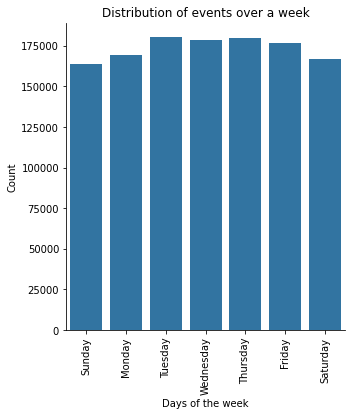

In [81]:
#Plot of event of a week
sns.catplot(x='dayofweek',kind="count", data = events_data, order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'], color='tab:blue')
plt.xticks(rotation=90)
plt.title("Distribution of events over a week")
plt.xlabel("Days of the week")
plt.ylabel("Count")
plt.show()


As we can see from the above plot mid week is were there is more number of events recorded. Most events are there in tuesdays followed by thursday and wednesdays.

#### Plot a graph representing the distribution of events per hour [for one-week data]

In [82]:
#count of weeks
events_data.week.value_counts()

18    1051104
17     164356
Name: week, dtype: Int64

In [83]:
#selecting most counted week
week_of_18_event_data = events_data[events_data['week'] == 18]

In [84]:
#first 5 rows
week_of_18_event_data.head()

,device_id,gender,age,group_train,event_id,date_time,longitude,latitude,year,month,hour,day,dayofweek,week
3,-1001337759327040000,M,30,M25-32,2774404.0,2016-05-07 09:14:24,119.0,29.70,2016,5,9,7,Saturday,18
4,-1001337759327040000,M,30,M25-32,3065018.0,2016-05-04 10:26:14,120.0,30.42,2016,5,10,4,Wednesday,18
5,-1001337759327040000,M,30,M25-32,3230344.0,2016-05-04 10:04:42,120.0,30.41,2016,5,10,4,Wednesday,18
6,-1001337759327040000,M,30,M25-32,2906128.0,2016-05-07 10:24:32,119.0,29.80,2016,5,10,7,Saturday,18
7,-1001337759327040000,M,30,M25-32,2876843.0,2016-05-07 10:23:56,119.0,29.80,2016,5,10,7,Saturday,18


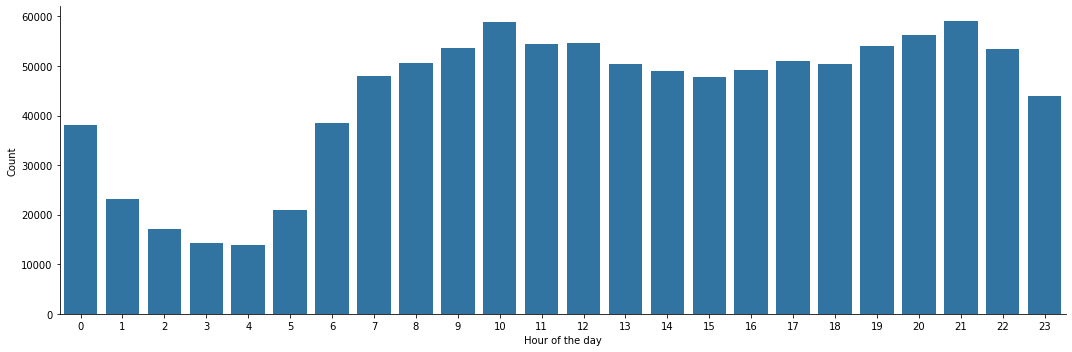

In [85]:
#plot of events per hour
sns.catplot(x='hour',kind="count", data = week_of_18_event_data, height=5, aspect=3,color='tab:blue')
plt.xlabel("Hour of the day")
plt.ylabel("Count")
plt.show()

Most number of evenst are recorded at 10 am and !0pm.

#### The difference in the distribution of events per hour for Male and Female consumers. [Show the difference using an appropriate chart for one-week data.]

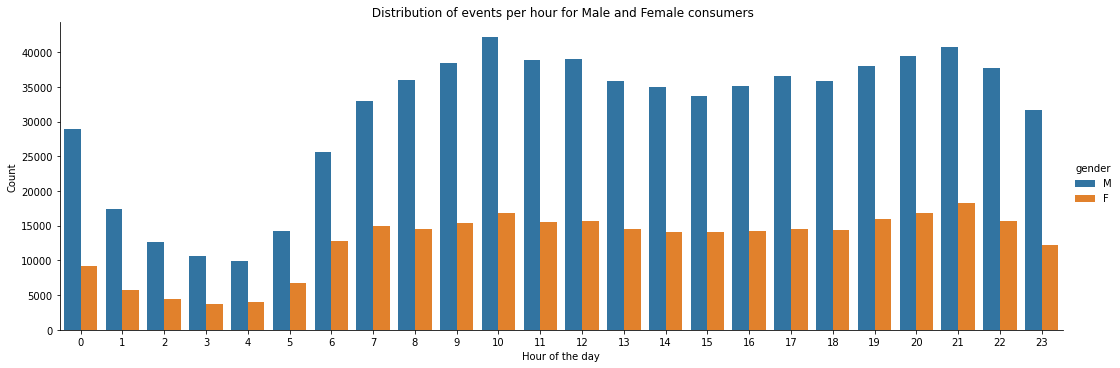

In [86]:
#plot of events per hour for male and female consumers
sns.catplot(x='hour',kind="count",hue="gender", data = week_of_18_event_data, height=5, aspect=3)
plt.title(" Distribution of events per hour for Male and Female consumers")
plt.xlabel("Hour of the day")
plt.ylabel("Count")
plt.show()

The pattern of most usage of phone at morning 10 and at night 10 is valid across different genders.

#### Is there any difference in the distribution of Events for different Age Groups over different days of the week? [Consider the following age groups: 0–24, 25–32, 33–45, and 46+]

In [87]:
#Defining a function to make different age groups
def age_group_generater (row):
    if row['age'] >= 0 and row['age'] <= 24:
        return '0-24'
    elif row['age'] >= 25 and row['age'] <= 32:
        return '25-32'
    elif row['age'] >= 33 and row['age'] <= 45:
        return '33-45'
    elif row['age'] >= 46:
        return '46+'

In [88]:
#applying the fuction
event['age_group'] = event.apply (lambda row: age_group_generater(row), axis=1)

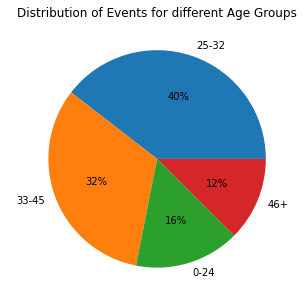

In [89]:
#Plot of percentage of different age group consumers
plt.figure(figsize=(15,5))
event.age_group.value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Distribution of Events for different Age Groups")
plt.ylabel(" ")
plt.show()

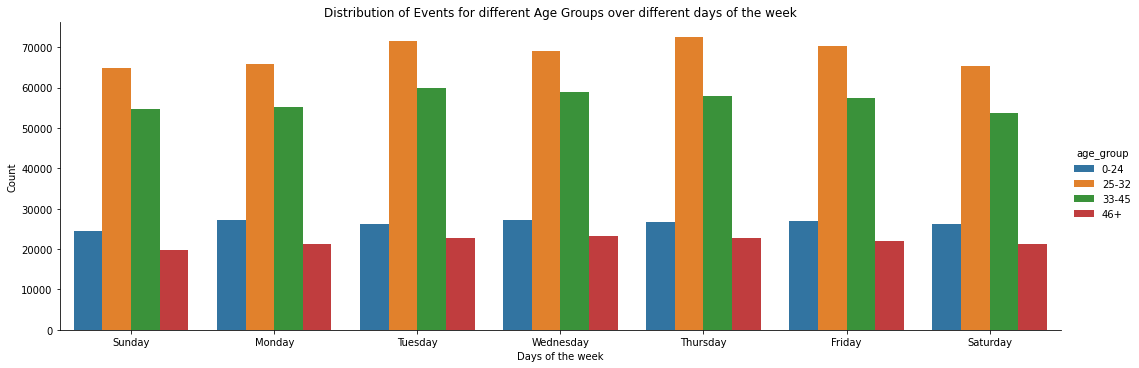

In [90]:
#plot of distibution of events across different age groups
sns.catplot(x='dayofweek',kind="count",hue='age_group',hue_order=['0-24', '25-32', '33-45','46+'], data = event, height=5, aspect=3,order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
plt.title("Distribution of Events for different Age Groups over different days of the week")
plt.xlabel("Days of the week")
plt.ylabel("Count")
plt.show()

There is significant difference in the ditribution of events amoung age groups, across the week
* The age group 0-24 exhibits more or less a steady pattren throughout the week and so is the 46+ age group
* The 25-32 age group shows the highest number of events across the week with a steady pattern followed by 33-45 age group

#### Stacked bar chart for the top 10 mobile brands across male and female consumers

In [91]:
#Cross table of phone brand and gender varaibles
mobile_brands_by_gender = pd.crosstab(index=non_event['phone_brand'],columns=non_event['gender'])

In [92]:
#Total
mobile_brands_by_gender['Total'] = mobile_brands_by_gender['F'] + mobile_brands_by_gender['M']

In [93]:
#top 10 phone brands
top_10_mobile_brands = mobile_brands_by_gender.sort_values('Total',ascending=False)[:10]

In [94]:
#droping the total column
top_10_mobile_brands.drop(['Total'], axis = 1, inplace=True)

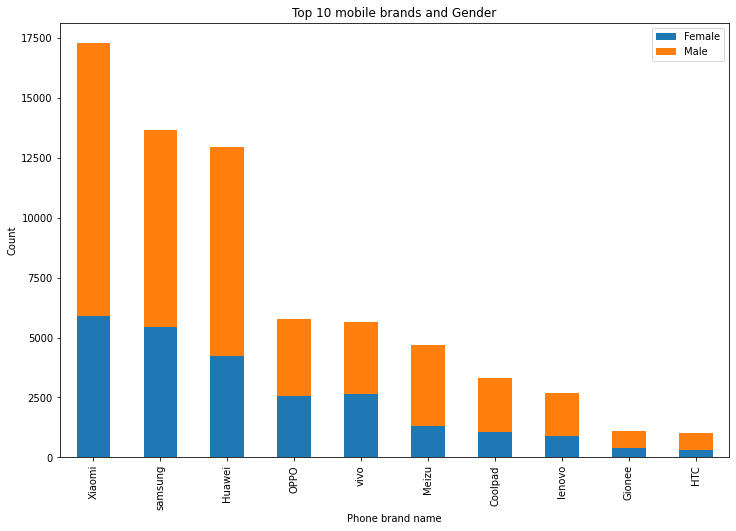

In [95]:
#stacked plot of top 10 mobile brand across the genders
top_10_mobile_brands.plot(kind='bar', stacked=True, figsize=(12,8), legend=False)
plt.title('Top 10 mobile brands and Gender')
plt.xlabel("Phone brand name")
plt.ylabel("Count")
plt.legend(['Female', 'Male'])
plt.show()

The above stacked bar chart is in agreement with the above given pie chart of the phone brands, with Xiaomi being the top brand amoung the male and female users, followed by Samsung and Huawei

### app dataset

#### A chart representing the ten frequently used applications and their respective male and female percentage.

In [96]:
#merging event and app
event_app= event.merge(app,on="event_id", how="inner")

In [97]:
#shape of the dataframe
event_app.shape

(78350281, 20)

In [98]:
#first 5 rows
event_app.head()

,device_id,gender,age,group_train,event_id,date_time,longitude,latitude,year,month,hour,day,dayofweek,week,age_group,app_id,is_installed,is_active,label_id,category
0,-1001337759327040000,M,30,M25-32,2774404.0,2016-05-07 09:14:24,119.0,29.7,2016,5,9,7,Saturday,18,25-32,-7054804880832650555,1,0,706,Customized 1
1,-1001337759327040000,M,30,M25-32,2774404.0,2016-05-07 09:14:24,119.0,29.7,2016,5,9,7,Saturday,18,25-32,-7054804880832650555,1,0,704,Property Industry 2.0
2,-1001337759327040000,M,30,M25-32,2774404.0,2016-05-07 09:14:24,119.0,29.7,2016,5,9,7,Saturday,18,25-32,-7054804880832650555,1,0,548,Industry tag
3,-1001337759327040000,M,30,M25-32,2774404.0,2016-05-07 09:14:24,119.0,29.7,2016,5,9,7,Saturday,18,25-32,-5368809411346728624,1,1,186,Taxi
4,-1001337759327040000,M,30,M25-32,2774404.0,2016-05-07 09:14:24,119.0,29.7,2016,5,9,7,Saturday,18,25-32,-5368809411346728624,1,1,548,Industry tag


In [99]:
#Subsetting for app used across genders
app_usage_by_gender = event_app[['app_id','gender','event_id']]

In [100]:
#first 5 rows
app_usage_by_gender.head()

,app_id,gender,event_id
0,-7054804880832650555,M,2774404.0
1,-7054804880832650555,M,2774404.0
2,-7054804880832650555,M,2774404.0
3,-5368809411346728624,M,2774404.0
4,-5368809411346728624,M,2774404.0


In [101]:
#dropping duplicates
app_usage_by_gender.drop_duplicates(inplace=True)

/home/ec2-user/.local/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [102]:
#basic info of dataset
app_usage_by_gender.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12235556 entries, 0 to 78350279
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   app_id    int64  
 1   gender    object 
 2   event_id  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 373.4+ MB


In [103]:
#Cross table with app_id and gender
app_usage_by_gender = pd.crosstab(index=app_usage_by_gender['app_id'],
                        columns=app_usage_by_gender['gender'])

In [104]:
#first 5 rows
app_usage_by_gender.head()

gender,F,M
app_id,,
-9221156934682287334,13,3
-9220899153371182692,0,14
-9218487885271516150,0,2
-9218310540360546691,0,20
-9217104312935103667,0,38


In [105]:
#Total
app_usage_by_gender['Total'] = app_usage_by_gender['F'] + app_usage_by_gender['M']

In [106]:
#top 10 apps
top_10_app_usage = app_usage_by_gender.sort_values('Total',ascending=False)[:10]

In [107]:
#dropping the total column
top_10_app_usage.drop(['Total'], axis = 1, inplace=True)

In [108]:
#resetting index
top_10_app_usage.reset_index(inplace=True)

In [109]:
top_10_app_usage.head(15)

gender,app_id,F,M
0,8693964245073640147,132424,300568
1,5927333115845830913,105256,233327
2,4348659952760821294,89215,215489
3,628020936226491308,77113,161880
4,3433289601737013244,42763,104287
5,-2320783822570582843,36471,76358
6,6284164581582112235,28718,74952
7,5729517255058371973,29903,71978
8,8948670408023620661,28540,71416
9,3683147815759994238,26965,71672


In [110]:
#Rearranging
top_10_app_usage_tidy = top_10_app_usage.melt(id_vars='app_id').rename(columns=str.title)

In [111]:
#dataframe
top_10_app_usage_tidy

,App_Id,Gender,Value
0,8693964245073640147,F,132424
1,5927333115845830913,F,105256
2,4348659952760821294,F,89215
3,628020936226491308,F,77113
4,3433289601737013244,F,42763
5,-2320783822570582843,F,36471
6,6284164581582112235,F,28718
7,5729517255058371973,F,29903
8,8948670408023620661,F,28540
9,3683147815759994238,F,26965


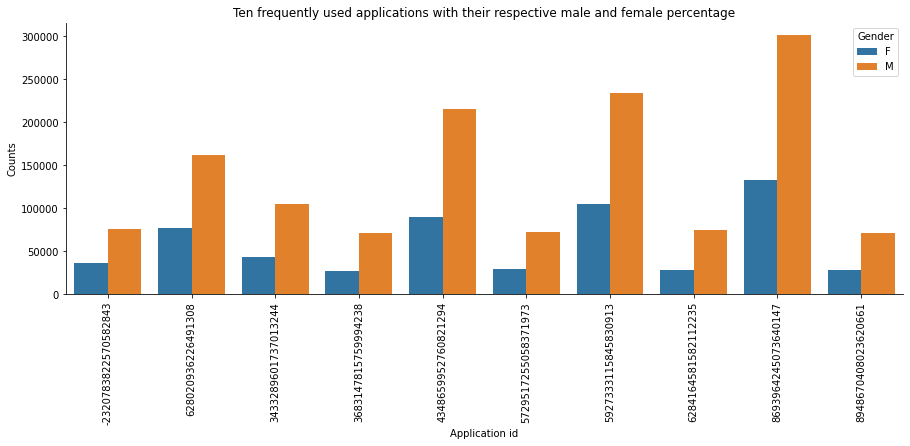

In [112]:
#plot of 10 frequently used app across genders
fig, ax1 = plt.subplots(figsize=(15, 5))
sns.barplot(x='App_Id', y='Value', hue='Gender', data=top_10_app_usage_tidy, ax=ax1)
plt.title("Ten frequently used applications with their respective male and female percentage")
plt.xlabel("Application id")
plt.ylabel("Counts")
plt.xticks(rotation=90, ha='center')
sns.despine(fig)

We can see the top 10 used apps. In those most apps are used by male than female.

In [113]:
#let us see tha categories of the top 10 used apps
top_10_apps = top_10_app_usage_tidy['App_Id']

In [114]:
#dropping duplicates
top_10_apps.drop_duplicates(inplace=True)

In [115]:
#series
top_10_apps

0    8693964245073640147
1    5927333115845830913
2    4348659952760821294
3     628020936226491308
4    3433289601737013244
5   -2320783822570582843
6    6284164581582112235
7    5729517255058371973
8    8948670408023620661
9    3683147815759994238
Name: App_Id, dtype: int64

In [116]:
#retreving coomplete event data
top_10_app_events = event_app.loc[event_app['app_id'].isin(top_10_apps)]

In [117]:
#resetting index
top_10_app_events.reset_index(inplace=True)

In [118]:
#counts of category of apps
top_10_app_events[['category']].value_counts()

category                 
Industry tag                 1767829
Property Industry 1.0        1462322
Property Industry 2.0        1077082
Relatives 1                   771575
IM                            771575
Pay                           609408
Custom label                  505222
unknown                       477986
Internet banking              403341
And the Church                403341
Services 1                    305507
Low risk                      304704
Moderate profitability        304704
Third party payment           304704
High Flow                     304704
Finance                       304704
fashion                       238993
online malls                  238993
weibo                         112829
Tencent                       101881
Total Cost 1                  101881
the film                      101881
"online shopping by group     101881
Buy class                     101881
P2P net loan                   98637
Liquid medium                  98637
Wealth Manag

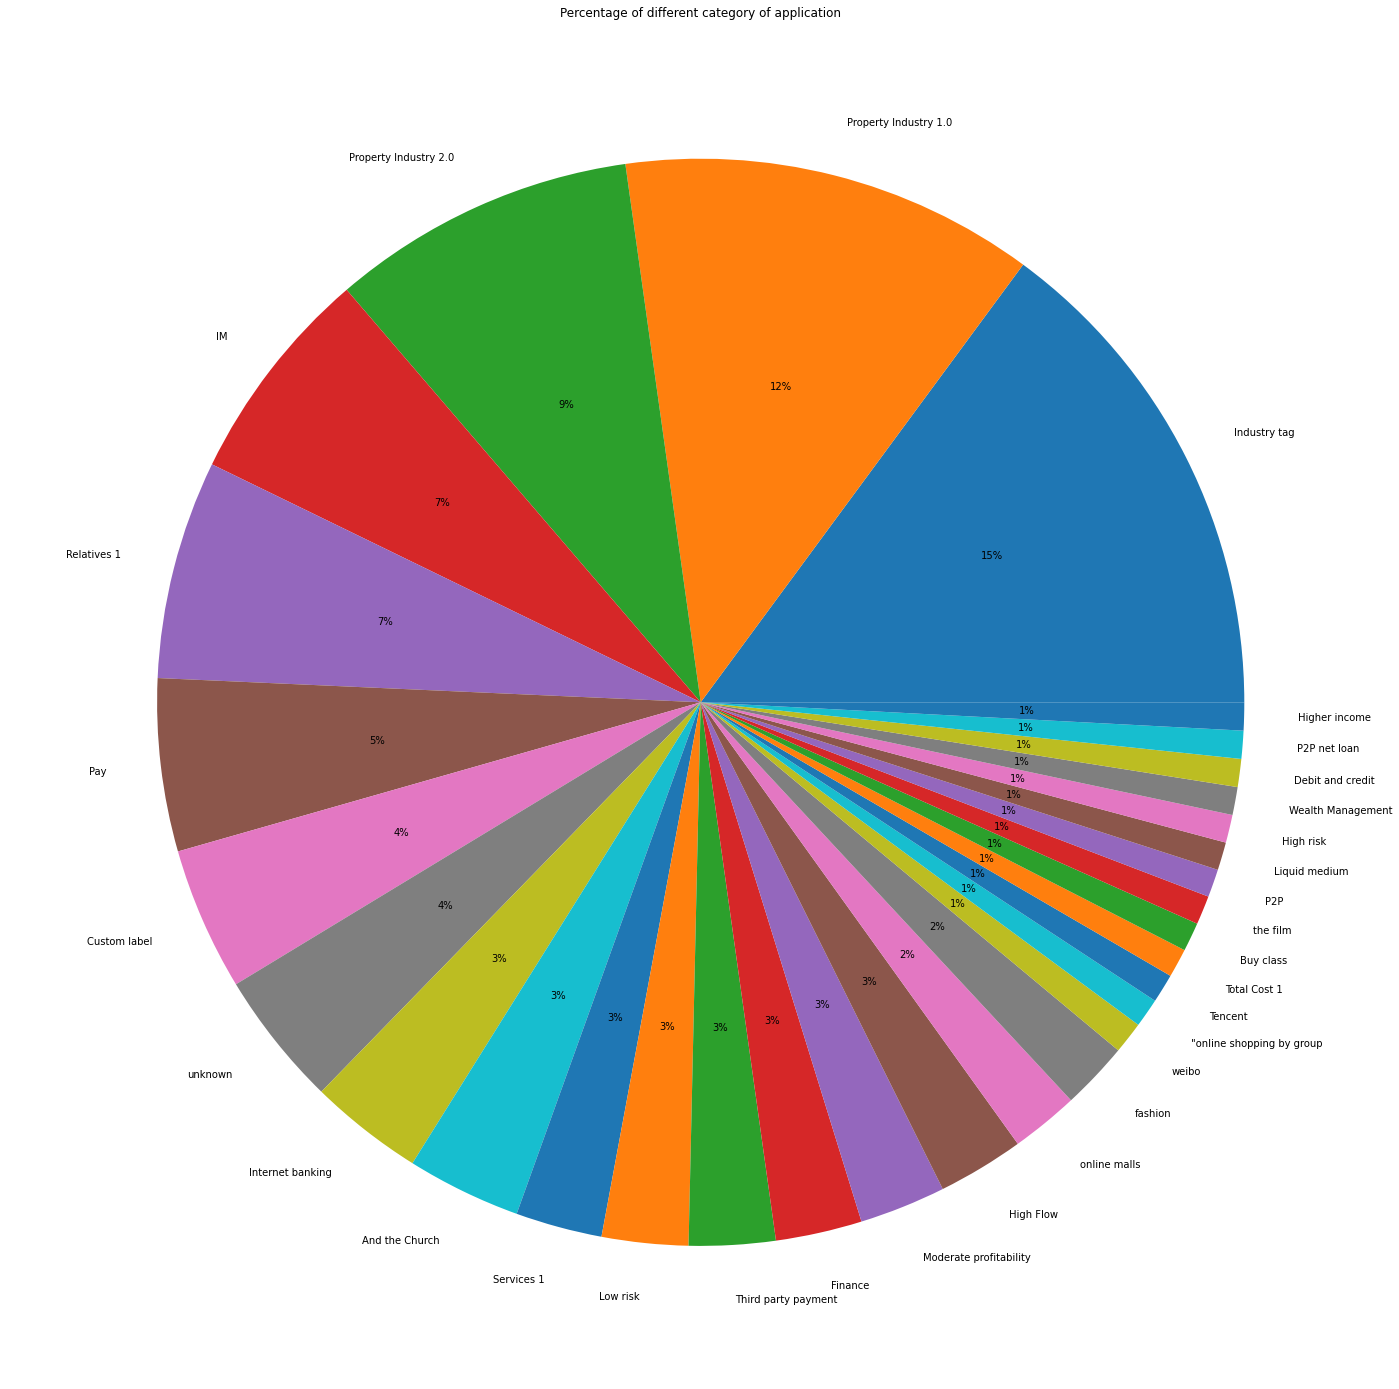

In [119]:
#pie plot of application categories
plt.figure(figsize=(25,25))
top_10_app_events.category.value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Percentage of different category of application")
plt.ylabel(" ")
plt.show()

#### List the top 10 mobile phone brands bought by customers by age groups.

In [120]:
#applying the age_group_generator on non_event dataset
non_event['age_group'] = non_event.apply (lambda row: age_group_generater(row), axis=1)

In [121]:
#first 5 rows
non_event.head()

,device_id,gender,age,group_train,phone_brand,device_model,age_group
0,-7548291590301750000,M,33,M32+,Huawei,è£è€€3C,33-45
1,-1819925713085810000,F,23,F0-24,OPPO,N1 Mini,0-24
2,3670076507269740000,M,33,M32+,Meizu,menote1 2,33-45
3,5333872006968810000,M,34,M32+,Xiaomi,xnote,33-45
4,5263633571423510000,M,27,M25-32,Huawei,hu1 Plus,25-32


In [122]:
#Cross table with phone brand and age_group
phone_brand_by_age_group = pd.crosstab(index=non_event['phone_brand'],
                        columns=non_event['age_group'])

In [123]:
#first 5 rows
phone_brand_by_age_group.head()

age_group,0-24,25-32,33-45,46+
phone_brand,,,,
AUX,0,1,2,1
Bacardi,0,0,3,0
Bifer,7,6,6,4
CUBE,21,27,14,4
Changhong,3,2,1,0


In [124]:
#total
phone_brand_by_age_group['Total'] = phone_brand_by_age_group['0-24'] + phone_brand_by_age_group['25-32'] + phone_brand_by_age_group['33-45'] + phone_brand_by_age_group['46+']

In [125]:
#top 10 phone brands
top_10_phone_brand = phone_brand_by_age_group.sort_values('Total',ascending=False)[:10]

In [126]:
#dropping total column
top_10_phone_brand.drop(['Total'], axis = 1, inplace=True)

In [127]:
#resetting index
top_10_phone_brand.reset_index(inplace=True)

In [128]:
#dataframe
top_10_phone_brand.head(15)

age_group,phone_brand,0-24,25-32,33-45,46+
0,Xiaomi,4201,7537,4000,1534
1,samsung,2343,5555,4175,1580
2,Huawei,2430,5100,3964,1452
3,OPPO,1846,2367,1183,377
4,vivo,1965,2317,1013,332
5,Meizu,1678,2052,687,276
6,Coolpad,796,1208,942,381
7,lenovo,600,1005,738,336
8,Gionee,324,400,278,117
9,HTC,236,436,251,89


In [129]:
#rearranging the dataframe
top_10_phone_brands_tidy = top_10_phone_brand.melt(id_vars='phone_brand').rename(columns=str.title)

In [130]:
#dataframe
top_10_phone_brands_tidy

,Phone_Brand,Age_Group,Value
0,Xiaomi,0-24,4201
1,samsung,0-24,2343
2,Huawei,0-24,2430
3,OPPO,0-24,1846
4,vivo,0-24,1965
5,Meizu,0-24,1678
6,Coolpad,0-24,796
7,lenovo,0-24,600
8,Gionee,0-24,324
9,HTC,0-24,236


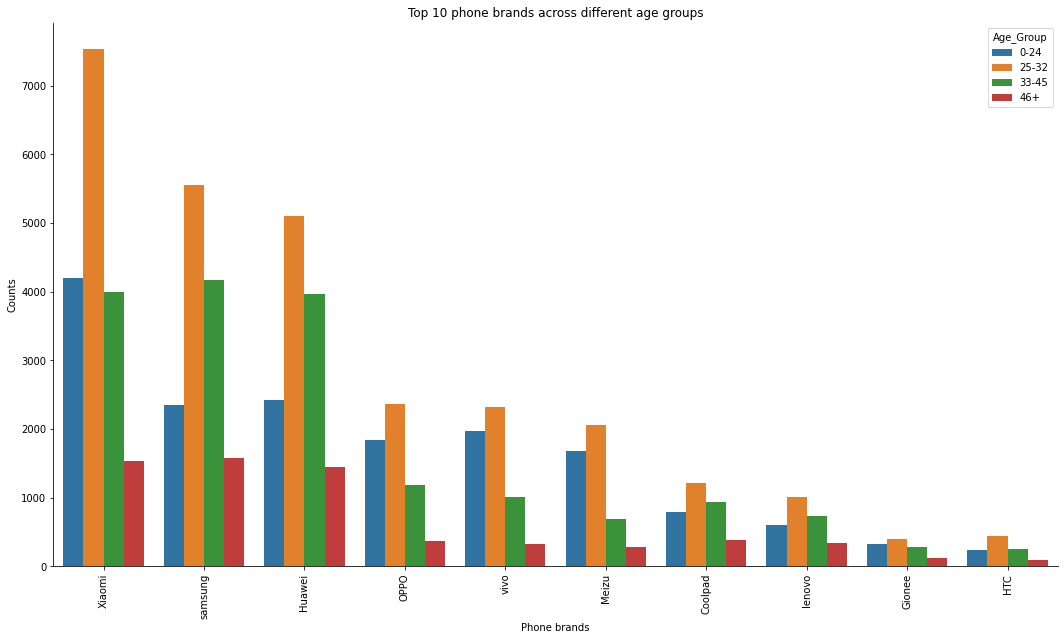

In [131]:
#plot of top 10 phone brands across different age groups
fig, ax1 = plt.subplots(figsize=(18, 10))
sns.barplot(x='Phone_Brand', y='Value', hue='Age_Group', data=top_10_phone_brands_tidy, ax=ax1)
plt.title("Top 10 phone brands across different age groups")
plt.xlabel("Phone brands")
plt.ylabel("Counts")
plt.xticks(rotation=90, ha='center')
sns.despine(fig)

Pricing plays a key role and we can see that mobile brands with competative proces are being purchased more.
Now, in all the brands, age group of 25-32 bought more phones, but the distribution of 0-24 and 33-45 is varried based on pricess. In general observation, 0-24 age-group people got more phones from the company whose pricess are comparatively less.

Take an example of Samsung and Huawei, those brands are old and has more brand value compared to Xiaomi, Oppo etc.

So, I could say with higher age group, brand value also played a key role and having an income also playes a role.

One more point to notice is that, as most of out data is from china, we can say Xiaomi is purchased more as it is a home country brand.

In [132]:
#Lets see the top 10 mobile brands by age group
phone_brand_by_age_group.drop(['Total'], axis = 1, inplace=True)
phone_brand_by_age_group.head()

age_group,0-24,25-32,33-45,46+
phone_brand,,,,
AUX,0,1,2,1
Bacardi,0,0,3,0
Bifer,7,6,6,4
CUBE,21,27,14,4
Changhong,3,2,1,0


In [133]:
#top 10 phone brands of 0-24 age group
top_10_phone_brand_for_0_24 = phone_brand_by_age_group.sort_values('0-24',ascending=False)[:10]
top_10_phone_brand_for_0_24.head(10)

age_group,0-24,25-32,33-45,46+
phone_brand,,,,
Xiaomi,4201,7537,4000,1534
Huawei,2430,5100,3964,1452
samsung,2343,5555,4175,1580
vivo,1965,2317,1013,332
OPPO,1846,2367,1183,377
Meizu,1678,2052,687,276
Coolpad,796,1208,942,381
lenovo,600,1005,738,336
Gionee,324,400,278,117


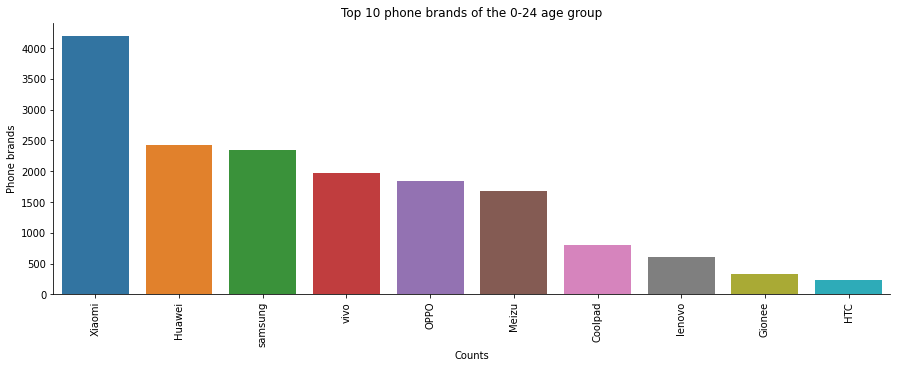

In [134]:
#resetting index
top_10_phone_brand_for_0_24.reset_index(inplace=True)
#plot
fig, ax1 = plt.subplots(figsize=(15, 5))
sns.barplot(x='phone_brand', y='0-24', data=top_10_phone_brand_for_0_24, ax=ax1)
plt.xticks(rotation=90, ha='center')
plt.title("Top 10 phone brands of the 0-24 age group")
plt.xlabel("Counts")
plt.ylabel("Phone brands")
sns.despine(fig)

In [135]:
#top 10 phone brands of 25-32 age group
top_10_phone_brand_for_25_32 = phone_brand_by_age_group.sort_values('25-32',ascending=False)[:10]
top_10_phone_brand_for_25_32.head(10)

age_group,0-24,25-32,33-45,46+
phone_brand,,,,
Xiaomi,4201,7537,4000,1534
samsung,2343,5555,4175,1580
Huawei,2430,5100,3964,1452
OPPO,1846,2367,1183,377
vivo,1965,2317,1013,332
Meizu,1678,2052,687,276
Coolpad,796,1208,942,381
lenovo,600,1005,738,336
HTC,236,436,251,89


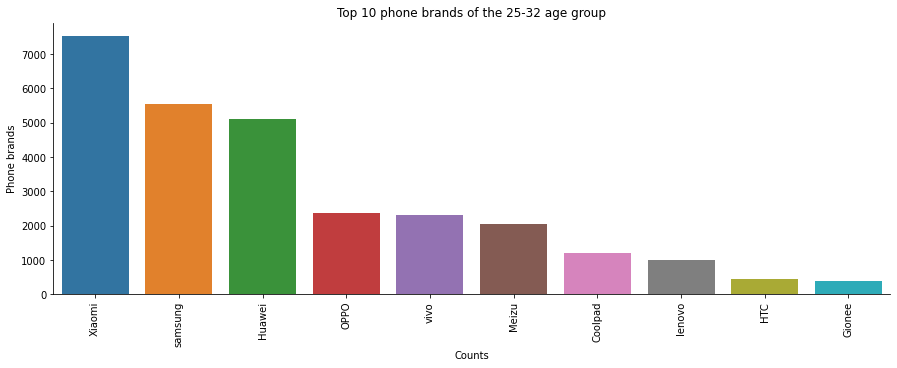

In [136]:
#resetting index
top_10_phone_brand_for_25_32.reset_index(inplace=True)
#plot
fig, ax1 = plt.subplots(figsize=(15, 5))
sns.barplot(x='phone_brand', y='25-32', data=top_10_phone_brand_for_25_32, ax=ax1)
plt.xticks(rotation=90, ha='center')
plt.title("Top 10 phone brands of the 25-32 age group")
plt.xlabel("Counts")
plt.ylabel("Phone brands")
sns.despine(fig)

In [137]:
#top 10 phone brand of 33-45 age group
top_10_phone_brand_for_33_45 = phone_brand_by_age_group.sort_values('33-45',ascending=False)[:10]
top_10_phone_brand_for_33_45.head(10)

age_group,0-24,25-32,33-45,46+
phone_brand,,,,
samsung,2343,5555,4175,1580
Xiaomi,4201,7537,4000,1534
Huawei,2430,5100,3964,1452
OPPO,1846,2367,1183,377
vivo,1965,2317,1013,332
Coolpad,796,1208,942,381
lenovo,600,1005,738,336
Meizu,1678,2052,687,276
Gionee,324,400,278,117


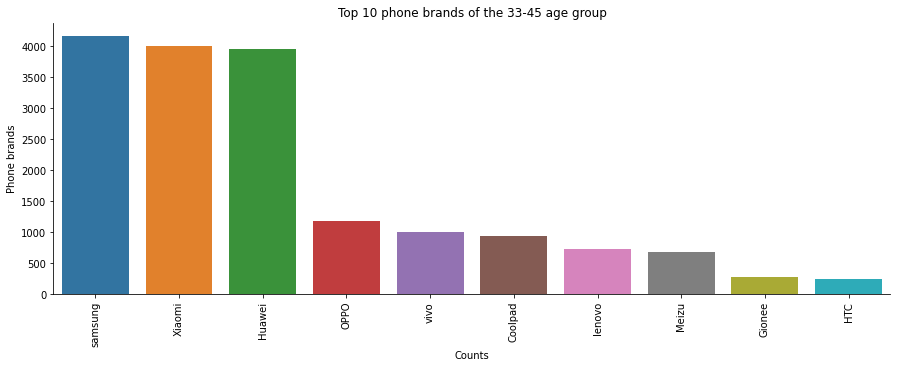

In [138]:
#resetting index
top_10_phone_brand_for_33_45.reset_index(inplace=True)
#plot
fig, ax1 = plt.subplots(figsize=(15, 5))
sns.barplot(x='phone_brand', y='33-45', data=top_10_phone_brand_for_33_45, ax=ax1)
plt.xticks(rotation=90, ha='center')
plt.title("Top 10 phone brands of the 33-45 age group")
plt.xlabel("Counts")
plt.ylabel("Phone brands")
sns.despine(fig)

In [139]:
#top 10 phone brand of 46+ age group
top_10_phone_brand_for_46 = phone_brand_by_age_group.sort_values('46+',ascending=False)[:10]
top_10_phone_brand_for_46.head(10)

age_group,0-24,25-32,33-45,46+
phone_brand,,,,
samsung,2343,5555,4175,1580
Xiaomi,4201,7537,4000,1534
Huawei,2430,5100,3964,1452
Coolpad,796,1208,942,381
OPPO,1846,2367,1183,377
lenovo,600,1005,738,336
vivo,1965,2317,1013,332
Meizu,1678,2052,687,276
Gionee,324,400,278,117


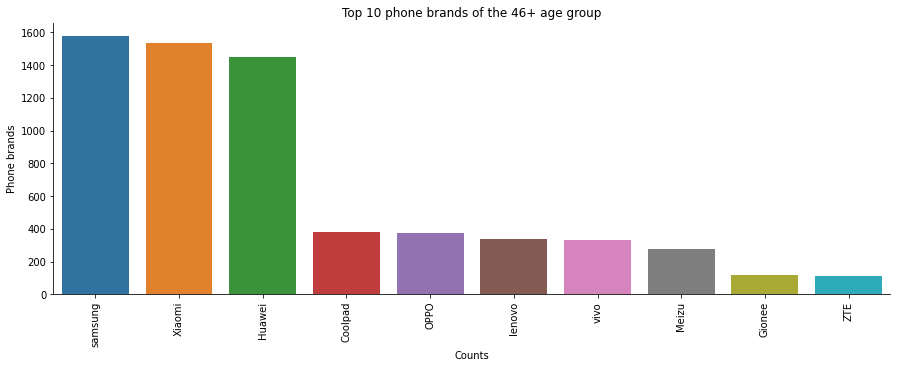

In [140]:
#resetting index
top_10_phone_brand_for_46.reset_index(inplace=True)
#plot
fig, ax1 = plt.subplots(figsize=(15, 5))
sns.barplot(x='phone_brand', y='46+', data=top_10_phone_brand_for_46, ax=ax1)
plt.xticks(rotation=90, ha='center')
plt.title("Top 10 phone brands of the 46+ age group")
plt.xlabel("Counts")
plt.ylabel("Phone brands")
sns.despine(fig)

People with age till 32 purchased Xiaomi followed by samsung or Huawei, Where as for age group above from 33, Samsung is purchased more follow by Xialmi or Huawei.

So, As we have seen, we can say that new generation is towards home brand and budget friendly phones, where as higher age group ppl is more towards brand value.

## Advanced Visualization

In [141]:
#importing the necessary library
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [142]:
#Random sample of 1 lakh data points for map visualizations
e=event.sample(n=100000)

In [143]:
#basic info
e.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 958717 to 55696
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   device_id    100000 non-null  int64         
 1   gender       100000 non-null  object        
 2   age          100000 non-null  int64         
 3   group_train  100000 non-null  object        
 4   event_id     95963 non-null   float64       
 5   date_time    95963 non-null   datetime64[ns]
 6   longitude    95963 non-null   float64       
 7   latitude     95963 non-null   float64       
 8   year         95963 non-null   Int32         
 9   month        95963 non-null   Int32         
 10  hour         95963 non-null   Int32         
 11  day          95963 non-null   Int32         
 12  dayofweek    95963 non-null   object        
 13  week         95963 non-null   Int32         
 14  age_group    100000 non-null  object        
dtypes: Int32(5), datetime64[ns](1)

#### Plot the visualisation plot for a sample of 1 lakh data points.

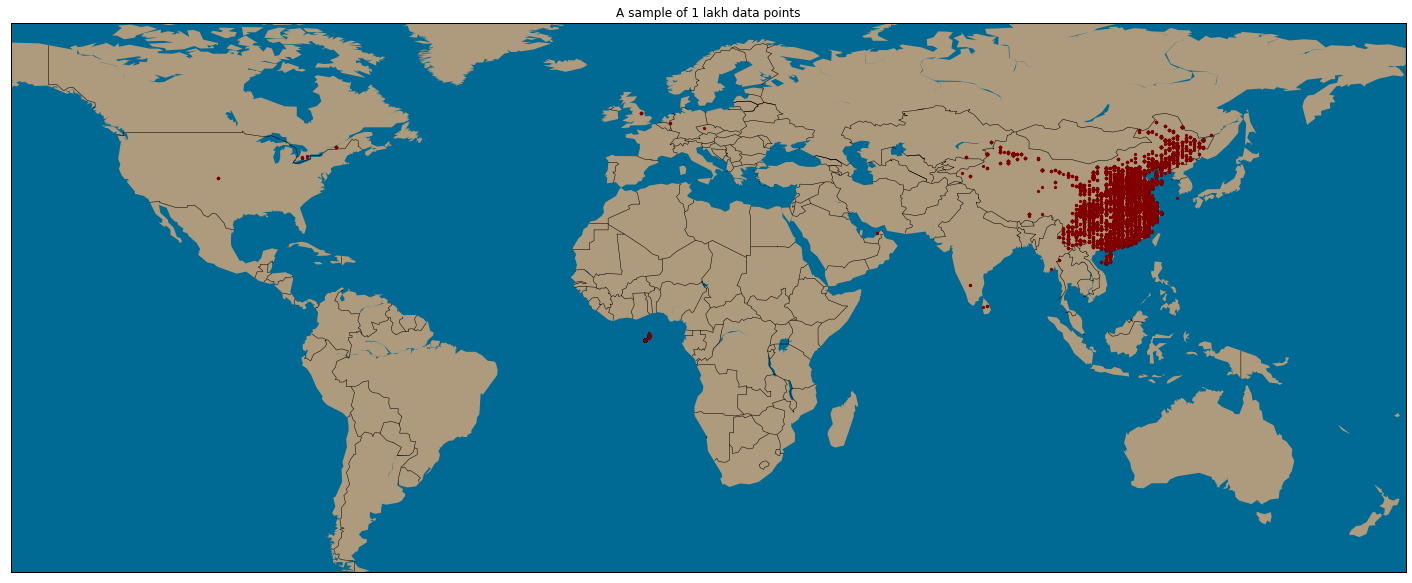

In [144]:
#Plot of the sample 1 lakh data points

fig = plt.figure(figsize=(25,25))
# Mercator of World
m = Basemap(projection='merc', resolution='c', epsg = 4269, 
            llcrnrlat=-55,  #latitude of lower left hand corner of the desired map domain
             urcrnrlat=75, #latitude of upper right hand corner of the desired map domain
             llcrnrlon=-150, #longitude of lower left hand corner of the desired map domain
             urcrnrlon=180, #longitude of upper right hand corner of the desired map domain
             lat_ts=0) #resolution of boundary dataset being used - c for crude
m.fillcontinents(color='#ae9b7d',lake_color='#006994') # sand beige land, ocean blue
m.drawmapboundary(fill_color='#006994')                # ocean blue background
m.drawcountries(linewidth=0.5)              # thin black line for country borders

# Plot the data
mxy = m(e["longitude"].tolist(), e["latitude"].tolist())
m.scatter(mxy[0], mxy[1], s=5, c="#800000", zorder=2)    # zorder for the points  

plt.title("A sample of 1 lakh data points")
plt.show()

Most of the data points are in and around China region

#### Compare the event visualisation plots based on the users' gender information

In [145]:
#subsetting the data according to gender information
event_f=e[(e['gender']=="F")]
event_m=e[(e['gender']=="M")]

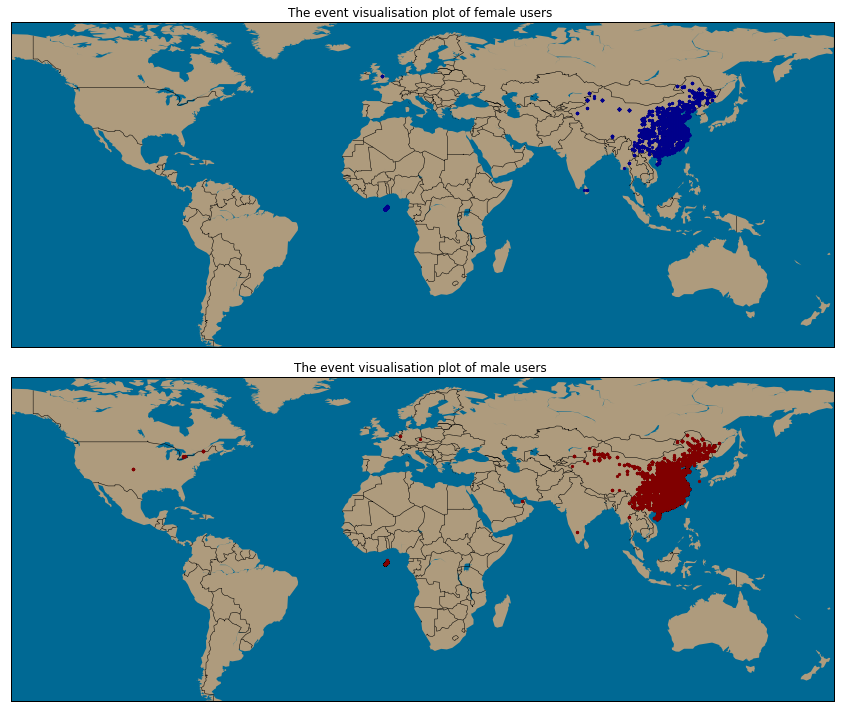

In [189]:
#plot according to gender
fig = plt.figure(figsize=(25,10))
plt.tight_layout()


plt.subplot(2,2,1)
m = Basemap(projection='merc', resolution='c', epsg = 4269, 
            llcrnrlat=-55,  #latitude of lower left hand corner of the desired map domain
             urcrnrlat=75, #latitude of upper right hand corner of the desired map domain
             llcrnrlon=-150, #longitude of lower left hand corner of the desired map domain
             urcrnrlon=180, #longitude of upper right hand corner of the desired map domain
             lat_ts=0) #resolution of boundary dataset being used - c for crude
m.fillcontinents(color='#ae9b7d',lake_color='#006994') # sand beige land, ocean blue
m.drawmapboundary(fill_color='#006994')                # ocean blue background
m.drawcountries(linewidth=0.5)  
mxy = m(event_f["longitude"].tolist(), event_f["latitude"].tolist())
m.scatter(mxy[0], mxy[1], s=5, c="#00008B", zorder=2)    # zorder for the points 
plt.title("The event visualisation plot of female users ")


plt.subplot(2,2,3)
# Mercator of World
m = Basemap(projection='merc', resolution='c', epsg = 4269, 
            llcrnrlat=-55,  #latitude of lower left hand corner of the desired map domain
             urcrnrlat=75, #latitude of upper right hand corner of the desired map domain
             llcrnrlon=-150, #longitude of lower left hand corner of the desired map domain
             urcrnrlon=180, #longitude of upper right hand corner of the desired map domain
             lat_ts=0) #resolution of boundary dataset being used - c for crude
m.fillcontinents(color='#ae9b7d',lake_color='#006994') # sand beige land, ocean blue
m.drawmapboundary(fill_color='#006994')                # ocean blue background
m.drawcountries(linewidth=0.5)  
# Plot the data
mxy = m(event_m["longitude"].tolist(), event_m["latitude"].tolist())
m.scatter(mxy[0], mxy[1], s=5, c="#800000", zorder=2)    # zorder for the points 

plt.title("The event visualisation plot of male users ")
plt.tight_layout()
plt.show()

It is quite evident that the result is in agreement with the results of EDA, that most users are males

#### Compare the event visualisation plots based on age groups

In [147]:
#subsetting thesample into different age_groups
event_y=e[(e['age_group']=="0-24")]
event_md=e[(e['age_group']=="25-32")]
event_od=e[(e['age_group']=="33-45") | (e['age_group']=="46+")]

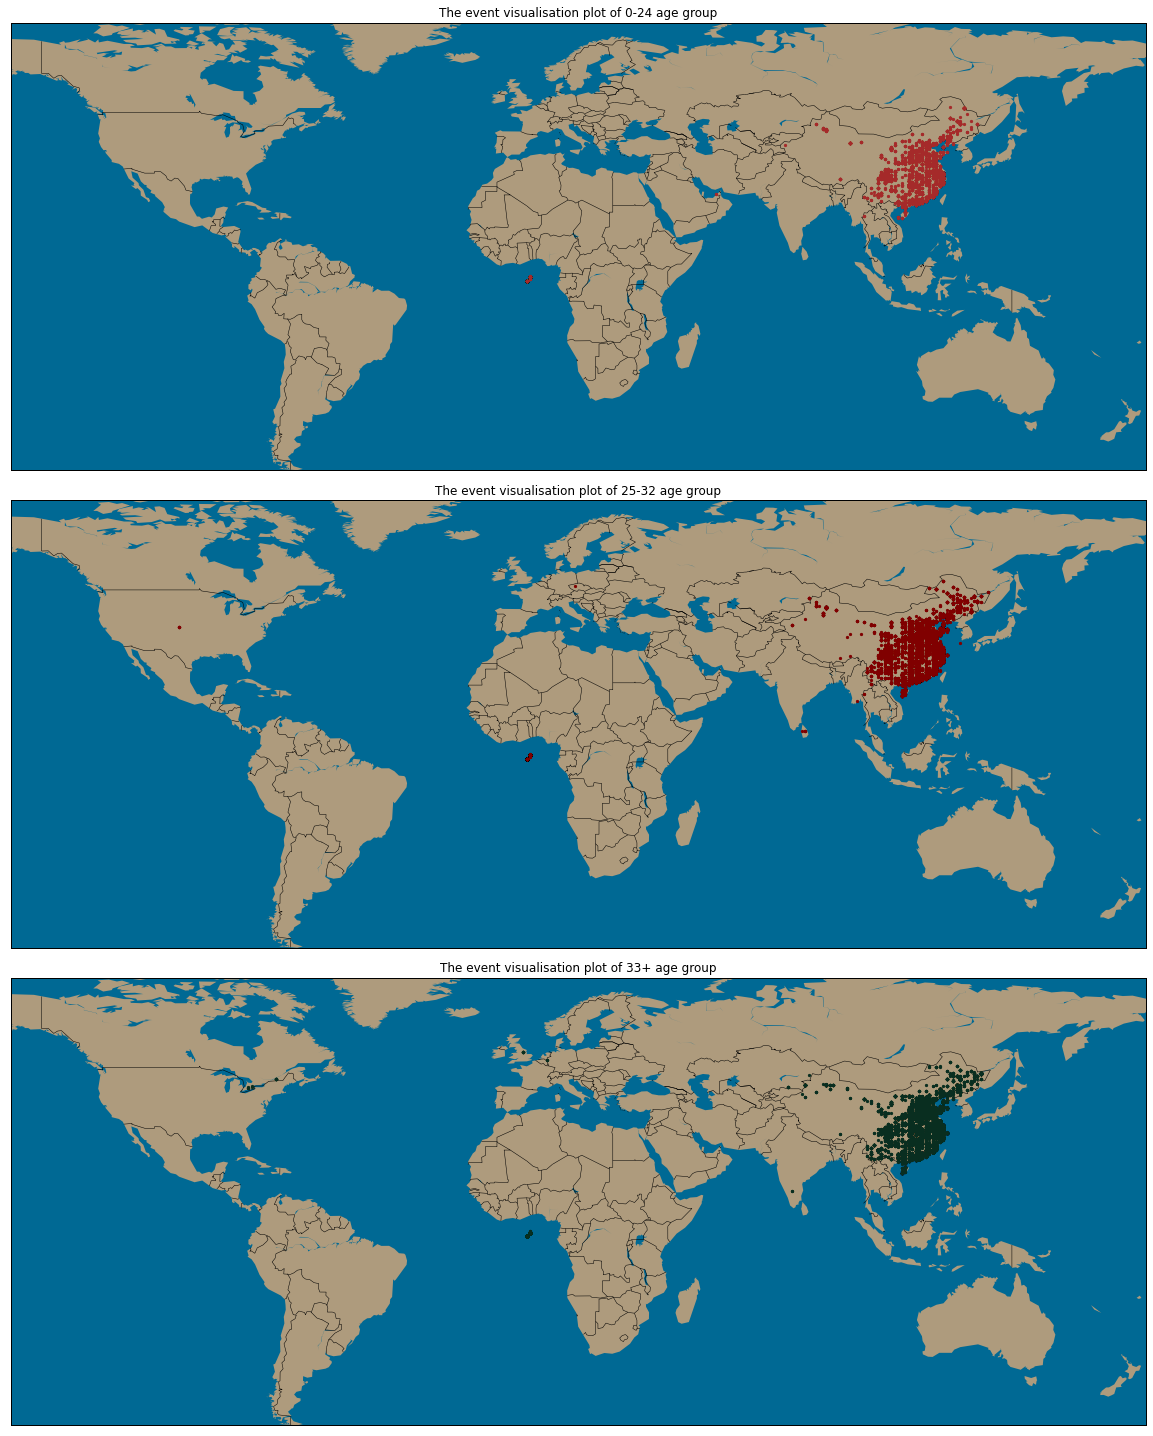

In [193]:
fig = plt.figure(figsize=(55,20))
plt.tight_layout()
plt.subplots_adjust(hspace=0)
plt.subplot(3,3,1)
# Mercator of World
m = Basemap(projection='merc', resolution='c', epsg = 4269, 
            llcrnrlat=-55,  #latitude of lower left hand corner of the desired map domain
             urcrnrlat=75, #latitude of upper right hand corner of the desired map domain
             llcrnrlon=-150, #longitude of lower left hand corner of the desired map domain
             urcrnrlon=180, #longitude of upper right hand corner of the desired map domain
             lat_ts=0) #resolution of boundary dataset being used - c for crude
m.fillcontinents(color='#ae9b7d',lake_color='#006994') # sand beige land, ocean blue
m.drawmapboundary(fill_color='#006994')                # ocean blue background
m.drawcountries(linewidth=0.5)  

# Plot the data
mxy = m(event_y["longitude"].tolist(), event_y["latitude"].tolist())
m.scatter(mxy[0], mxy[1], s=5, c="#A52A2A", zorder=2)    # zorder for the points  
plt.title("The event visualisation plot of 0-24 age group")
plt.tight_layout()

plt.subplot(3,3,4)
# Mercator of World
m = Basemap(projection='merc', resolution='c', epsg = 4269, 
            llcrnrlat=-55,  #latitude of lower left hand corner of the desired map domain
             urcrnrlat=75, #latitude of upper right hand corner of the desired map domain
             llcrnrlon=-150, #longitude of lower left hand corner of the desired map domain
             urcrnrlon=180, #longitude of upper right hand corner of the desired map domain
             lat_ts=0) #resolution of boundary dataset being used - c for crude
m.fillcontinents(color='#ae9b7d',lake_color='#006994') # sand beige land, ocean blue
m.drawmapboundary(fill_color='#006994')                # ocean blue background
m.drawcountries(linewidth=0.5)  
mxy = m(event_md["longitude"].tolist(), event_md["latitude"].tolist())
m.scatter(mxy[0], mxy[1], s=5, c="#800000", zorder=2)    # zorder for the points  
plt.title("The event visualisation plot of 25-32 age group")
plt.tight_layout()

plt.subplot(3,3,7)
# Mercator of World
m = Basemap(projection='merc', resolution='c', epsg = 4269, 
            llcrnrlat=-55,  #latitude of lower left hand corner of the desired map domain
             urcrnrlat=75, #latitude of upper right hand corner of the desired map domain
             llcrnrlon=-150, #longitude of lower left hand corner of the desired map domain
             urcrnrlon=180, #longitude of upper right hand corner of the desired map domain
             lat_ts=0) #resolution of boundary dataset being used - c for crude
m.fillcontinents(color='#ae9b7d',lake_color='#006994') # sand beige land, ocean blue
m.drawmapboundary(fill_color='#006994')                # ocean blue background
m.drawcountries(linewidth=0.5)  
mxy = m(event_od["longitude"].tolist(), event_od["latitude"].tolist())
m.scatter(mxy[0], mxy[1], s=5, c="#092E20", zorder=2)    # zorder for the points  
plt.title("The event visualisation plot of 33+ age group")

plt.show()

The event visualization plots points that  the 25-32 age group has the more number of users followd by the 33+ age group. The least number of users are in the age group of 0-24.
This again comes in agreement with the EDA results